In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from mlp import MLP

In [12]:
dataset = load_digits()
X = dataset.data
Y = dataset.target
Y = np.eye(10)[Y]  # one hot

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [14]:
epochs = 80
learning_rate = 0.001

D_in = X_train.shape[1]
H1 = 128
H2 = 32
D_out = Y_train.shape[1]

In [15]:
mlp = MLP(D_in, H1, H2, D_out, epochs, learning_rate, "sigmoid", "sigmoid", "softmax")

Loss, Acc, loss, acc = mlp.fit(X_train, Y_train)
f"Loss: {loss}, Acc: {acc}"

100%|██████████| 80/80 [00:12<00:00,  6.60it/s]


'Loss: 0.0038984807609849493, Acc: 0.9798190675017397'

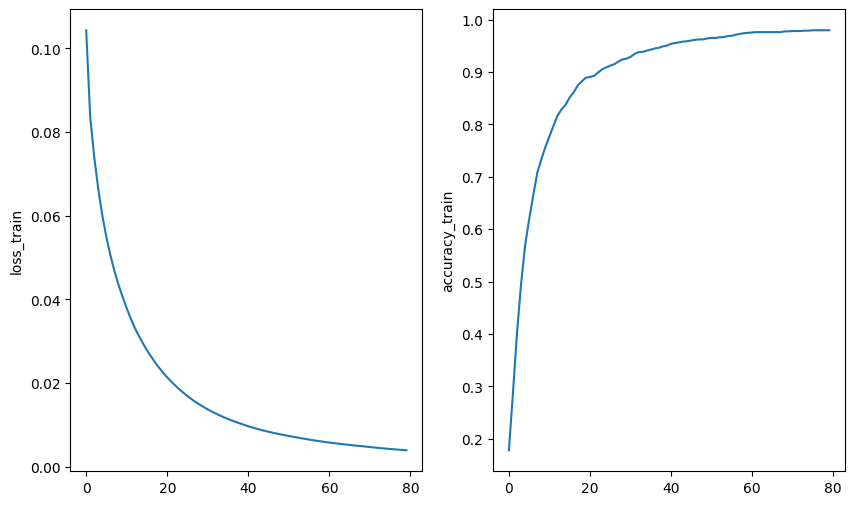

In [16]:
plt.figure(figsize=(10,6))
# loss
plt.subplot(1,2,1)
plt.plot(Loss)
plt.ylabel("loss_train")
# accuracy
plt.subplot(1,2,2)
plt.plot(Acc)
plt.ylabel("accuracy_train")
plt.show()

In [17]:
LOSS = []
ACC = []
for epoch in range(epochs):
    Y_pred_test = []
    for x, y in zip(X_test, Y_test):
        x = x.reshape(-1, 1)
        _, _, y_pred = mlp.forward(x)
        Y_pred_test.append(y_pred)

    loss, acc = mlp.calc_Loss_Acc(Y_pred_test, Y_test)
    LOSS.append(Loss)
    ACC.append(Acc)

f"loss = {loss}, acc = {acc}"

'loss = 0.01832968641350857, acc = 0.8805555555555555'

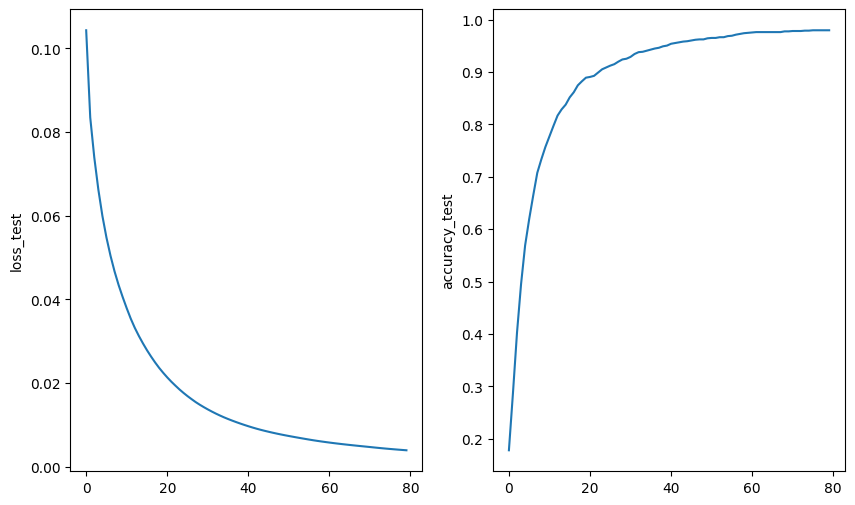

In [18]:
plt.figure(figsize=(10,6))
# loss
plt.subplot(1,2,1)
plt.plot(Loss)
plt.ylabel("loss_test")
# accuracy
plt.subplot(1,2,2)
plt.plot(Acc)
plt.ylabel("accuracy_test")
plt.show()

In [19]:
import cv2

image = cv2.imread("test.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.astype(np.float32)
x = image
Y_pred = []
for x in X_test:
    x = x.reshape(-1,1)
    _, _, out3 = mlp.forward(x)
    y_pred = out3
    Y_pred.append(y_pred)
Y_pred = np.array(Y_pred).reshape(-1, D_out)
print(f"result: {np.argmax(y_pred)}")

result: 4
